(0.9422222222222222, 0.9238095238095239)
(0.9650793650793651, 0.8533333333333334)


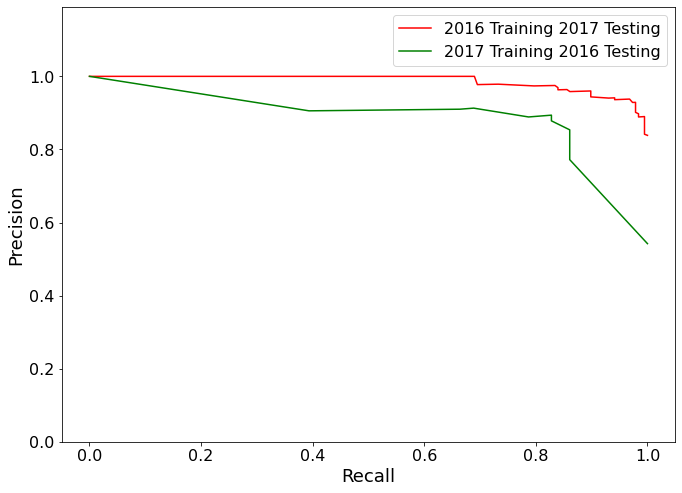

In [22]:
#import all library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,balanced_accuracy_score,precision_recall_curve, roc_curve
from all_functions import *
from joblib import dump, load

"""
Select feature selection type
"""
feature_selection='ANOVA'

if feature_selection=='Strong_Feature':
    Features=[9,30]
elif feature_selection=='ANOVA':
    Features=[30,9]    

#Define path
file_maturity_2016='C:/Users/tusha/Downloads/Peanut_Maturity.csv'
file_maturity_2017='C:/Users/tusha/Downloads/Peanut_Maturity_.csv'
feature_maturity_2016='C:/All/Peanut_Maturity_Classification'
feature_maturity_2017='C:/All/Peanut_Maturity_Classification_2017'


#Dataset Creation
Index_2016,Color_index_2016,All_columns,Maturity_2016,Final_Data_2016,Final_Data_Selected_2016=datacreate_2016(file=file_maturity_2016\
                                                                  ,path1=feature_maturity_2016,W_select=199)


if feature_selection=='Strong_Feature':
    
    X_train_2016,X_test_2017,y_train_2016,y_test_2017=Strong_feature_train_test_dataset_create(Features=Features[0],X_train=Final_Data_Selected_2016,\
                                                        y_train=Maturity_2016,X_test=Final_Data_Selected_2017,\
                                                        y_test=Maturity_2017)
    X_train_2017,X_test_2016,y_train_2017,y_test_2016=Strong_feature_train_test_dataset_create(Features=Features[1],X_train=Final_Data_Selected_2017,\
                                                        y_train=Maturity_2017,X_test=Final_Data_Selected_2016,\
                                                        y_test=Maturity_2016)
elif feature_selection=='ANOVA':
    
    X_train_2016,X_test_2017,y_train_2016,y_test_2017=anova_train_test_dataset_create(Features=Features[0],X_train=Final_Data_Selected_2016,\
                                                        y_train=Maturity_2016,X_test=Final_Data_Selected_2017,\
                                                        y_test=Maturity_2017)
    X_train_2017,X_test_2016,y_train_2017,y_test_2016=anova_train_test_dataset_create(Features=Features[1],X_train=Final_Data_Selected_2017,\
                                                        y_train=Maturity_2017,X_test=Final_Data_Selected_2016,\
                                                        y_test=Maturity_2016)

#Recall_Precision_Curve   
pipeline_rf = load(f'RF_Best_{Features[0]}_2016_{feature_selection}.joblib') 
pipeline_rf1 = load(f'RF_Best_{Features[1]}_2017_{feature_selection}.joblib')

print((pipeline_rf.score(X_train_2016, y_train_2016),pipeline_rf.score(X_test_2017, y_test_2017)))
print((pipeline_rf1.score(X_train_2017, y_train_2017),pipeline_rf1.score(X_test_2016, y_test_2016)))


#Plotting ROC_AUC curve and Precision Recall_curve
y_pred_test=pipeline_rf.predict_proba(X_test_2017)
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test_2017, y_pred_test[:,1])

y_pred_test1=pipeline_rf1.predict_proba(X_test_2016)
precision_test1, recall_test1, thresholds_test1 = precision_recall_curve(y_test_2016, y_pred_test1[:,1])

plt.figure(figsize=(11,8))
plt.plot(recall_test,precision_test,'-r')
plt.plot(recall_test1,precision_test1,'-g')
plt.ylim([0,1.19])
# plt.title('Precision_vs_Recall')
plt.legend(['2016 Training 2017 Testing','2017 Training 2016 Testing'],loc ="upper right",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Recall',fontsize=18)
plt.ylabel('Precision',fontsize=18)
plt.savefig(f'Precision_Recall_Strong.jpg',dpi=600)